In [1]:
import os
import numpy as np
import pandas as pd
from nilearn import masking, image
from scipy.stats import ttest_1samp, pearsonr,ttest_ind,ttest_rel
import statsmodels.formula.api as smf
import seaborn as sns
import statsmodels.api as sm
import matplotlib
import matplotlib.pyplot as plt
sns.set_theme(style="white")
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['axes.spines.top'] = False
matplotlib.rcParams['axes.spines.right'] = False

def p2sign(p):
    if  p<=0.001:
        sign='***'
    elif p<=0.01:
        sign='**'
    elif p<=0.05:
        sign='*'
    else:
        sign='n.s.'
    return sign

## Load data

In [2]:
# specify subjects
participants_tsv = r'/mnt/workdir/DCM/BIDS/participants.tsv'
participants_data = pd.read_csv(participants_tsv, sep='\t')
data =  participants_data.query("(game2_fmri>=0.5)")
subjects_id = data['Participant_ID'].to_list()

# set camp
cmap_template = r'/mnt/data/DCM/result_backup/2023.5.14/Nilearn/game2/distance_spct/Setall/6fold/{}/zmap/distance_zmap.nii.gz'

# set roi
roi  = image.load_img(r'/mnt/workdir/DCM/Docs/Mask/VMPFC/VMPFC_MNI152NL_new.nii.gz')


# extract mean activity
subs_cmap_list = [cmap_template.format(sub_id) for sub_id in subjects_id]
subs_mean_activity = np.mean(masking.apply_mask(subs_cmap_list, roi),axis=1)

data['Consistency_effect'] = subs_mean_activity

data['Inference_acc'] = data['game2_test_acc']
# zscore consistencey_effect
#data['Consistency_effect'] = (data['Consistency_effect'] - data['Consistency_effect'].mean())/data['Consistency_effect'].std()
data['beh_diff'] = data['game2_test_acc'] - data['game1_acc']

/tmp/ipykernel_4065151/21883492.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Consistency_effect'] = subs_mean_activity
/tmp/ipykernel_4065151/21883492.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Inference_acc'] = data['game2_test_acc']
/tmp/ipykernel_4065151/21883492.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

0.16474331217560328 0.022051146035123984


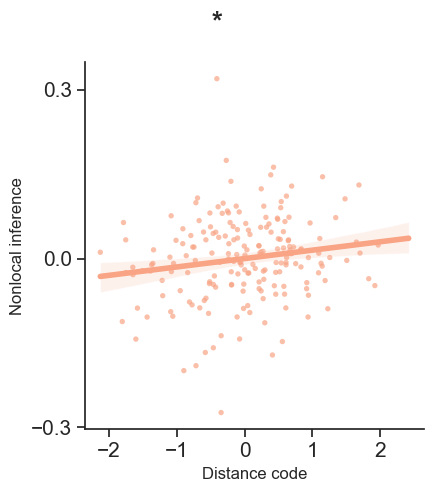

In [12]:
fig, ax = plt.subplots(figsize=(4.5,5))
# Fit regression model (using the natural log of one of the regressors)
# Fit regression models and get residuals
results1 = smf.ols('Inference_acc ~ game1_acc', data=data).fit()
results2 = smf.ols('Consistency_effect ~ game1_acc', data=data).fit()
# Create a new DataFrame with the residuals
resid_data = pd.DataFrame({
    'Consistency_effect_resid': results2.resid,
    'Inference_resid': results1.resid
})

# # Plot the residuals against one another
#data_remove  = data.query("-3<Consistency_effect<3")# #'#F8A485'
sns.regplot(x='Consistency_effect_resid', y='Inference_resid', data=resid_data,color='#F8A485',scatter_kws={'s':15,'edgecolor':'None','alpha':0.7},line_kws={'linewidth':4})
# sns.regplot(x='Consistency_effect', y='Inference_acc', data=data,color='#F8A485',scatter_kws={'s':30,'edgecolor':'None','alpha':1},line_kws={'linewidth':4})
plt.xlabel('Distance code')
plt.ylabel('Nonlocal inference')

plt.xticks([-2,-1,0,1,2],size=15)
#plt.xlim([-2.1,2.1])
plt.yticks([-0.3,0,0.3],size=15)
#plt.xlim([-2.1,2.1])

#move overall title up
fig.subplots_adjust(top=0.92)

r, p = pearsonr(resid_data['Consistency_effect_resid'],resid_data['Inference_resid'])
print(r,p)
if p < 0.05:
    fig.suptitle('{}'.format(p2sign(p)),size=20,fontweight='bold')
else:
    fig.suptitle('{} '.format(p2sign(p)),size=20,fontweight='bold')

# save figure
fig.tight_layout()
# Add tick lines to the bottom and left spines
ax.tick_params(axis='x', which='both', bottom=True, top=False, direction='out')
ax.tick_params(axis='y', which='both', left=True, right=False, direction='out')
savepath = r'/mnt/workdir/DCM/Result/paper/figure5/Game2_distance_mPFC_Acc_beyong_game1_partial_corr.pdf'
plt.savefig(savepath, bbox_inches='tight', pad_inches=0, dpi=300, transparent=True)
plt.show()

0.21065081366553498 0.003276708579142346


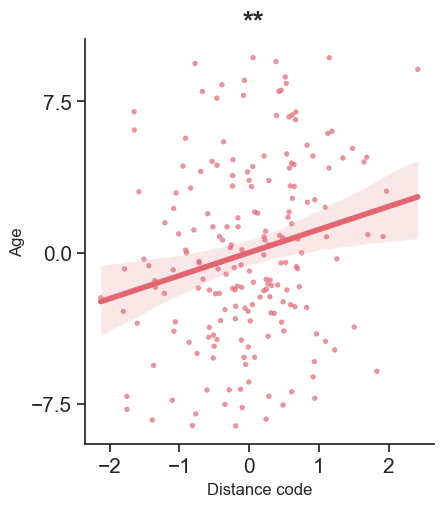

In [13]:
fig, ax = plt.subplots(figsize=(4.5,5))
# Fit regression model (using the natural log of one of the regressors)
# Fit regression models and get residuals
results1 = smf.ols('Age ~ game1_acc', data=data).fit()
results2 = smf.ols('Consistency_effect ~ game1_acc', data=data).fit()
# Create a new DataFrame with the residuals
resid_data = pd.DataFrame({
    'Consistency_effect_resid': results2.resid,
    'Age_resid': results1.resid
})

# # Plot the residuals against one another
#data_remove  = data.query("-3<Consistency_effect<3")# #'#F8A485'
sns.regplot(x='Consistency_effect_resid', y='Age_resid', data=resid_data,color='#e36570',scatter_kws={'s':15,'edgecolor':'None','alpha':0.7},line_kws={'linewidth':4})
# sns.regplot(x='Consistency_effect', y='Inference_acc', data=data,color='#F8A485',scatter_kws={'s':30,'edgecolor':'None','alpha':1},line_kws={'linewidth':4})
plt.xlabel('Distance code')
plt.ylabel('Age')

plt.xticks([-2,-1,0,1,2],size=15)
#plt.xlim([-2.4,2.4])
plt.yticks([-7.5,0,7.5],size=15)
#plt.xlim([-2.1,2.1])

#move overall title up
fig.subplots_adjust(top=0.92)

r, p = pearsonr(resid_data['Consistency_effect_resid'],resid_data['Age_resid'])
print(r,p)
if p < 0.05:
    fig.suptitle('{}'.format(p2sign(p)),size=20,fontweight='bold')
else:
    fig.suptitle('{} '.format(p2sign(p)),size=20,fontweight='bold')

# save figurefig.tight_layout()
# Add tick lines to the bottom and left spines
ax.tick_params(axis='x', which='both', bottom=True, top=False, direction='out')
ax.tick_params(axis='y', which='both', left=True, right=False, direction='out')
savepath = r'/mnt/workdir/DCM/Result/paper/figure5/Game2_distance_mPFC_Age_beyong_game1_partial_corr.pdf'
plt.savefig(savepath, bbox_inches='tight', pad_inches=0, dpi=300, transparent=True)
plt.show()